
# Introduction to Multi-Armed Bandits: Fundamentals
Watch **0 – 27:53** of the video below.

This notebook covers the portion of the lecture from 0:00 to 27:53. Watch 0:00 – 27:53 of the video below before continuing.
It also includes built-in packages and helper functions to make it easier to run experiments, visualize results, and follow along with the concepts in the lecture





In [1]:
from IPython.display import IFrame

IFrame('https://www.youtube.com/embed/aQJP3Z2Ho8U?start=120', width=800, height=450)


In the multi-armed bandit problem, an agent makes a sequence of choices over time steps  
$$
t = 1, 2, 3, \dots, T.
$$
The agent must select an action $A_t$. The specific arm or action selected at time $t$ comes from a set of $K$ possible actions.

For example, at time $t=1$ we select action 1:
$$
A_1 = 1
$$

For example, at time $t=2$ we select action 0:
$$
A_2 = 0
$$

After selecting action $A_t$, the agent receives a reward $R_t$, which is a numerical value from the environment. We do not really know the relationship between $R_t$ and the action selected, but we assume that for every action there is a specific reward distribution. The reward is random, even if the same action is selected multiple times.

The history up to time $t$ is defined as:
$$
\mathcal H_t = \{(A_1,R_1),\dots,(A_{t-1},R_{t-1})\}.
$$




The goal of the agent is to select a sequence of actions over time that maximizes the total reward
received from the environment. More formally, the agent aims to choose actions
$A_1, A_2, \dots, A_T$ such that the cumulative reward is as large as possible.

$$
\max_{A_1,\dots,A_T} \sum_{t=1}^{T} R_t
$$

Since the rewards are random and the relationship between actions and rewards is unknown,
the agent must make decisions based on past observations contained in the history
$\mathcal H_t$.

In many bandit problems, especially when the time horizon is large, it is more useful to consider
the average reward instead of the total reward. The average reward measures how much reward the
agent receives per time step.

$$
\frac{1}{T}\sum_{t=1}^{T} R_t
$$

As $T$ becomes large, maximizing the average reward is equivalent to selecting actions that have
the highest expected reward. This formulation avoids dependence on the length of the interaction
and is commonly used in stationary multi-armed bandit problems.



## Action-Value Function

We start off with the assumption that there is a real action-value function $q(a)$. The function $q(a)$ is deterministic and fixed, and it does not output a reward directly. Instead, it represents the expected reward for selecting action $a$.

Basically, $q(a)$ is the expected amount of reward you are going to see from choosing action $a$. When an action $a$ is selected, the reward observed is random, but over many selections the average reward will approach $q(a)$.

An example of a simple setting is the following. We assume the true action values are:
$$
q(0)=1,\quad q(1)=-1,\quad q(2)=2,\quad q(3)=4
$$

If we know these values, then the action that maximizes the expected reward is:
$$
\hat a = \arg\max_a q(a)
$$
$$
\hat a = \arg\max_a [q(0)=1,q(1)=-1,q(2)=2,q(3)=4]
$$
$$
\hat a = 3
$$

When we select an action $a$, we do not observe $q(a)$ directly. Instead, we observe a random reward drawn from an action-dependent distribution:
$$
R_t \sim P(r \mid a)
$$
The mean of this distribution is given by $q(a)$.

We distinguish between the true value of an action and the reward observed at each time step. The action-value function is defined as:
$$
q(a) \doteq \mathbb{E}[r \mid a].
$$


We assume that given an action $A_t = a$ selected at time $t$, the expected reward is $q(a)$. 
The reward $R_t$ is random and is sampled from an action-dependent reward distribution 
$P(r \mid a)$, lets see an example.



## Gaussian Reward Distribution

For a stationary bandit problem, we assume that the reward distribution does not change over time.
In this case, we assume the reward follows a **Gaussian (Normal) distribution**.

$$
P(r \mid a = a) = \mathcal{N}(r|q(a), \sigma^2)
$$

where $ q(a)$ is the mean reward of action $a$, and $\sigma^2$ is the variance.

The probability density function of the Gaussian distribution is given by:

$$
f(r \mid q(a), \sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}
\exp\left(-\frac{(r - q(a))^2}{2\sigma^2}\right)
$$

This means that even though the action-value function $q(a)$ is deterministic, the observed reward
$R_t$ can vary due to randomness in the environment.


This code generates Gaussian rewards $R_t$ randomly for a multi-armed bandit environment. Each action
(arm) has a fixed action-value $q(a)$, which represents the expected reward, and a standard deviation
that controls how much the reward varies. When an arm is selected at time $t$, the environment samples
a reward $R_t$ from a Gaussian distribution centered at $q(a)$. As a result, the observed reward $R_t$
can change every time an action is selected, even though the true action-value $q(a)$ remains the same.

The `ContinuousBandits` package provides the `GaussianBandits` constructor, which generates a bandit
environment with Gaussian rewards. The parameters `q` and `stds` specify the means and standard
deviations of the Gaussian distributions, and the length of these lists determines the number of
actions.



In [8]:
from deepmind_bandits.bandit_generator import GaussianBandits
import numpy as np
np.random.seed(0)

q = [0.2, 0.5, -0.1, 3.0]
stds  = [0.1, 0.2, 0.1, 0.1]

env = GaussianBandits(q, stds)
num_arms = env.num_arms
num_actions=num_arms

n=0
reward = env.pull_arm(0)   # pull arm 0
print("Reward:", reward)
# test: pull each arm once
for arm in range(num_arms):
    reward = env.pull_arm(arm)
    print(f"A_{n}={arm}, R_{n}= {reward:.3f} reward fucion  q({arm})={q[arm]}")
    n+=1


Reward: 0.37640523459676645
A_0=0, R_0= 0.240 reward fucion  q(0)=0.2
A_1=1, R_1= 0.696 reward fucion  q(1)=0.5
A_2=2, R_2= 0.124 reward fucion  q(2)=-0.1
A_3=3, R_3= 3.187 reward fucion  q(3)=3.0



This code generates Gaussian rewards $R_t$ randomly for a multi-armed bandit environment. Each action
(arm) has a fixed action-value $q(a)$, which represents the expected reward, and a standard deviation
that controls how much the reward varies. When an arm is selected at time $t$, the environment samples
a reward $R_t$ from a Gaussian distribution centered at $q(a)$. As a result, the observed reward $R_t$
can change every time an action is selected, even though the true action-value $q(a)$ remains the same.


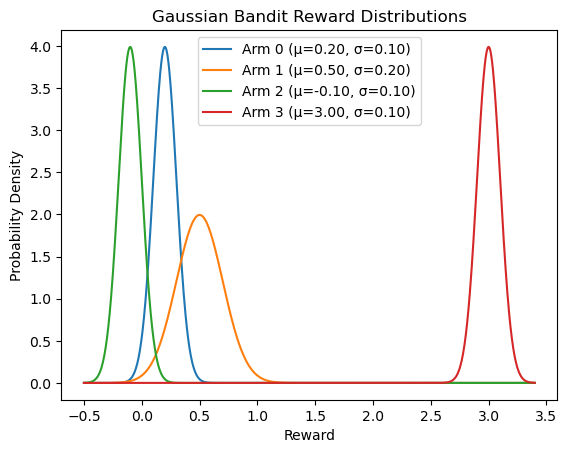

In [9]:
env.plot_parametric_distributions()

We can plot the reward $R_t$ as a time series generated from a Gaussian distribution centered at
$q(a)$. From this plot, we can see the distribution that generates the time series, with rewards
spread around the mean value $q(a)$.

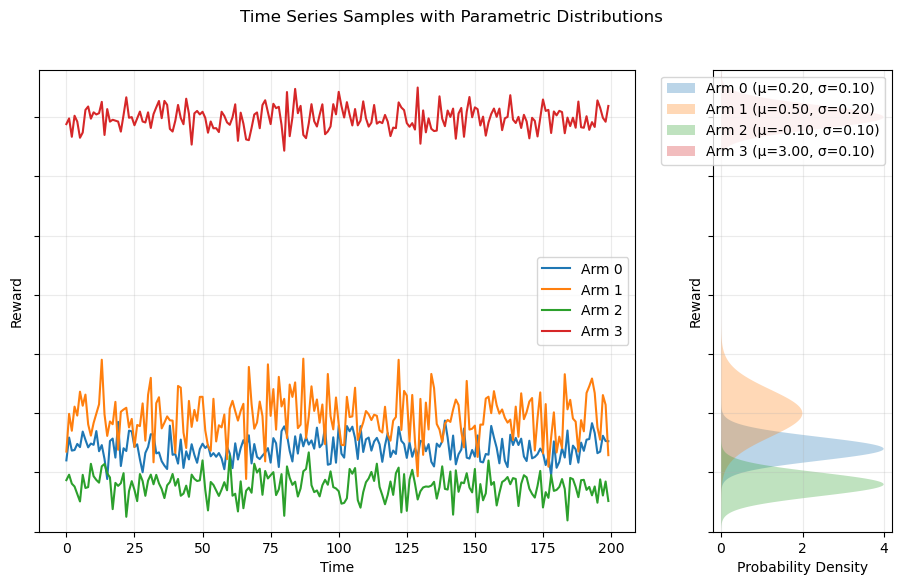

In [10]:
env.plot_time_series_with_distribution(T=200)

### Estimated Value ($Q_t$)

Before we get into bandit algorithms, we need to discuss the estimation problem. In practice, we do
not have access to the true action-value function $q(a)$, so we must estimate it from observed
rewards.

The estimated value at time $t$, denoted by $Q_t(a)$, is typically calculated using the sample
average of the rewards received for that action:
$$
Q_t(a) \doteq \frac{\sum_{i=1}^{t-1} R_i \cdot \mathbb{1}_{A_i = a}}
{\sum_{i=1}^{t-1} \mathbb{1}_{A_i = a}}
$$
where $\mathbb{1}$ is the indicator function, which equals 1 when the condition is true and 0
otherwise.

To save memory, estimates can be updated incrementally instead of recomputing the full average.
The general incremental update rule for the estimate is:
$$
Q_{t+1}(a) = Q_t(a) + \alpha \bigl(R_t - Q_t(a)\bigr)
$$

Here, $\alpha$ is the step-size parameter. When using the sample-average method, $\alpha$ is chosen as:
$$
\alpha = \frac{1}{\sum_{i=1}^{t} \mathbb{1}_{A_i = a}}
$$
which is the inverse of the number of times action $a$ has been selected. However, $\alpha$ can also
be chosen differently, for example as a constant step size.


We plot the estimated value $Q_t(a)$ over time to observe how it converges to the true action-value
$q(a)$. Initially, the estimate $Q_0(a)$ is set to zero, which may be far from the true value.
As the agent continues to select actions and observe rewards, the estimate is updated using the
sample-average rule. Over time, as more rewards are collected for a given action, the variance of
the estimate decreases and $Q_t(a)$ approaches $q(a)$. This convergence occurs because the rewards
are sampled from a stationary Gaussian distribution centered at $q(a)$, and the law of large numbers
ensures that the average reward converges to the expected value.




## Greedy Action Selection

The greedy method always selects the action that currently has the highest estimated value,
prioritizing exploitation over exploration:
$$
A_t \doteq \operatorname*{argmax}_a Q_t(a)
$$
This approach rarely works well in practice because it does not explore, but it is useful as a
toy example to understand the basic idea of action selection, so we try it out here.

This code implements a greedy bandit agent with sample-average value updates.
 Action values Q(a) are estimated incrementally from observed rewards, and at each
 time step the agent selects the action with the highest current estimate. Random
 tie-breaking is used when multiple actions have the same estimated value.

In [11]:
import numpy as np

Q = np.array([0.0 for _ in range(num_arms)])
N_a = np.array([0 for _ in range(num_arms)])

T = 1000

# Store Q_t for each arm at each time step
Q_history = np.zeros((T, num_arms))

n = 0
for t in range(T):

    # greedy action selection with random tie-breaking
    max_Q = np.max(Q)
    candidate_arms = np.where(Q == max_Q)[0]
    arm = np.random.choice(candidate_arms)

    reward = env.pull_arm(arm)

    N_a[arm] += 1
    Q[arm] = Q[arm] + (1 / N_a[arm]) * (reward - Q[arm])


    n += 1

print("Final estimated values Q:", Q[arm])
print("Final action values a", arm)

Final estimated values Q: 0.20359296527334403
Final action values a 0


We observe that action three has the highest reward, and the estimated action-value function converges
to the true value.


## Multi-Armed Bandit Performance Metrics
This result alone does not show how well the agent performs overall. To evaluate how good the agent
is, we introduce the following performance measures, which build on the quantities defined above.



### Optimal Value

The optimal value is the maximum expected reward possible in the given environment:
$$
v_* = \max_{a \in \mathcal{A}} q(a) = q(a^*)
$$

Using the above example:
$$
v_* = \max_{a \in \mathcal{A}} [0.2, 0.5, -0.1, 3.0] = 3
$$



### Suboptimality Gap

The suboptimality gap measures the expected loss incurred by selecting action $a$ instead of the
optimal action:
$$
\Delta_a = v_* - q(a)
$$

For example, if we select action 1:
$$
\Delta_1 = v_* - q(1)
$$
$$
\Delta_1 = 3 - 0.5 = 2.5
$$



### Regret

Regret measures the total loss due to selecting suboptimal actions over time. It can be defined
either as total regret or as average regret.

The total (cumulative) regret up to time $T$ is given by:
$$
L_T = \sum_{t=1}^{T} \bigl(v_* - q(A_t)\bigr)
$$

The average regret is the total regret normalized by time:


The `BanditDataAnalyzer` takes the true action means and the number of actions as input parameters.
The `means` parameter specifies the expected reward for each action, while `num_actions` defines how
many actions are available in the environment. During the simulation, the analyzer records actions
and rewards and computes the performance metrics defined above, including Q-value estimates,
cumulative reward, and cumulative regret.
The `analyzer.update_and_analyze(action, reward)`  will update the and reward and find the 



In [12]:
from deepmind_bandits.bandit_metrics import BanditDataAnalyzer

analyzer = BanditDataAnalyzer(q, num_actions=len(q))


In [13]:
import numpy as np

Q = np.array([0.0 for _ in range(num_arms)])
N_a = np.array([0 for _ in range(num_arms)])

T = 20

# Store Q_t for each arm at each time step
Q_history = np.zeros((T, num_arms))

n = 0
for t in range(T):

    # greedy action selection with random tie-breaking
    max_Q = np.max(Q)
    candidate_arms = np.where(Q == max_Q)[0]
    action = np.random.choice(candidate_arms)

    reward = env.pull_arm(action)

    N_a[action ] += 1
    Q[action ] = Q[action ] + (1 / N_a[action ]) * (reward - Q[action])
    analyzer.update_and_analyze(action, reward)


    n += 1

print("Final estimated values Q:", Q[action])
print("Final action values a", action )

Final estimated values Q: 2.954065037365582
Final action values a 3


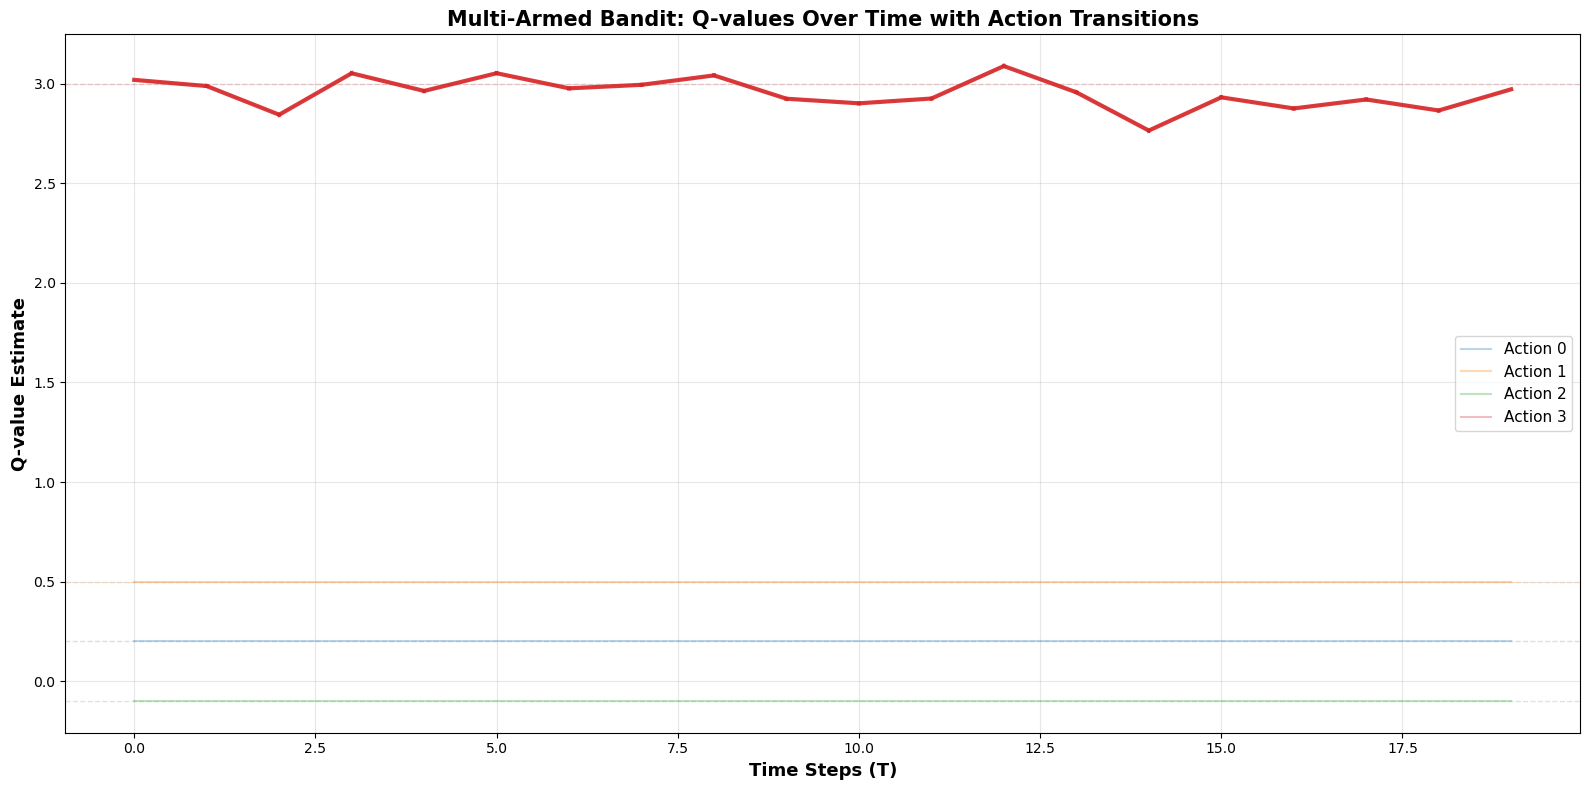


Transitions detected: 0


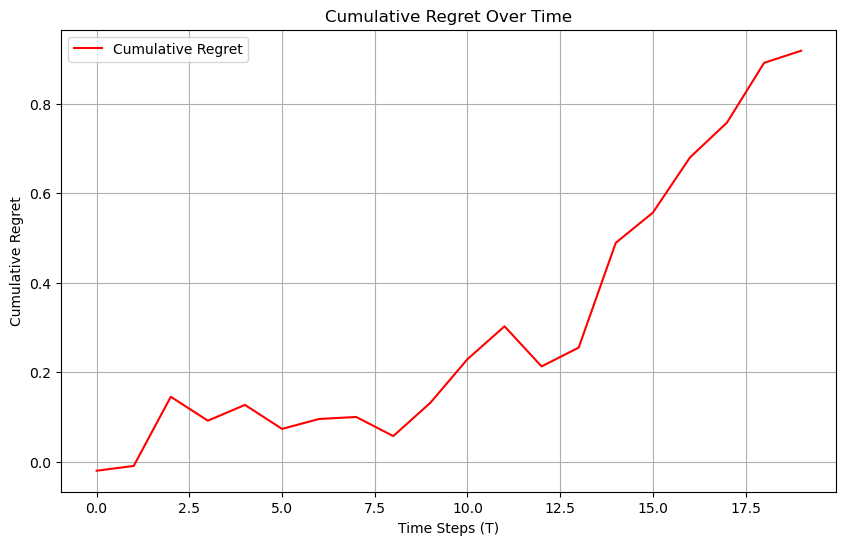

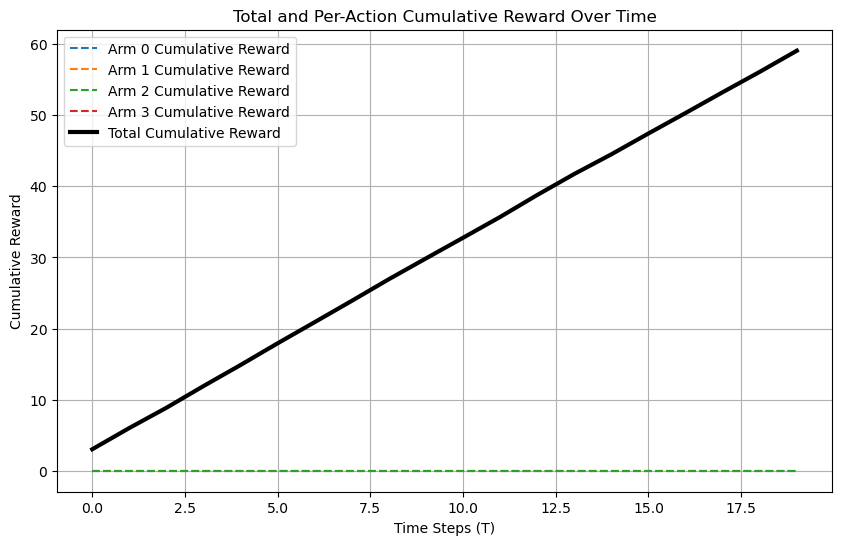

In [14]:
analyzer.finalize_analysis()
analyzer.plot_Qvalue()
analyzer.plot_regret()
analyzer.plot_cumulative_reward()

The problem with greedy algorithms is that if they select the wrong action early on, they can get stuck in a suboptimal solution, even when the best action is clearly identifiable overall. This problem becomes worse when the action-value functions are closer together, since the rewards for a given value of R can overlap across actions.

For example, consider the action values:
$$
q(0)=0.2,\; q(1)=0.5,\; q(2)=2.8,\; q(3)=3.0]
$$

with corresponding standard deviations:
$$
\sigma_i= =0.1, i=0,1,2,3
$$

Because the reward distributions for actions 2 and 3 overlap, early sampled rewards may incorrectly suggest that action 2 is better than action 3.

If the greedy algorithm selects the wrong action in the first few steps, it may commit to that action and fail to explore alternatives. For instance, if the first few observed rewards for action 2 are unusually large, the algorithm may favor this action prematurely. We can then analyze how this early bias affects the accumulated regret over time.

Creating a 'GaussianBandits the  distrabuiton and time serese we get



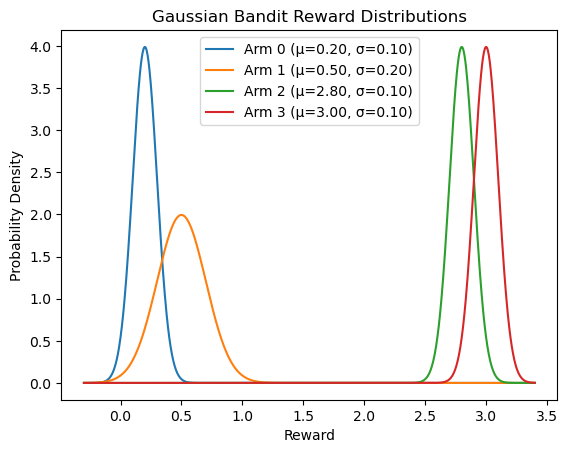

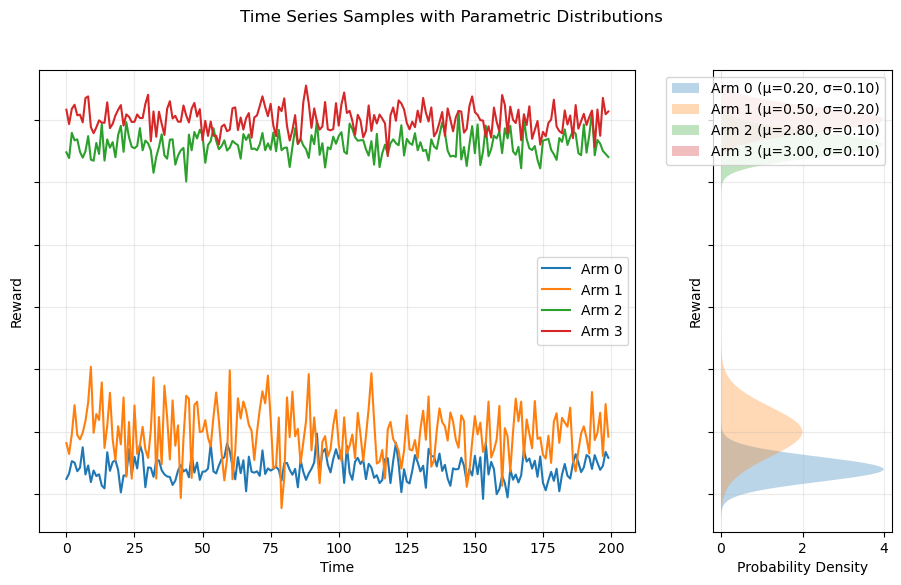

In [15]:
q = [0.2, 0.5, 2.8, 3.0]
stds  = [0.1, 0.2, 0.1, 0.1]

env = GaussianBandits(q, stds)
env.plot_parametric_distributions()
env.plot_time_series_with_distribution(T=200)

In [16]:
analyzer = BanditDataAnalyzer(q, num_actions=len(q))

Q = np.array([0.0 for _ in range(num_arms)])
N_a = np.array([0 for _ in range(num_arms)])

T = 20

# Store Q_t for each arm at each time step
Q_history = np.zeros((T, num_arms))

n = 0
for t in range(T):

    # greedy action selection with random tie-breaking
    max_Q = np.max(Q)
    candidate_arms = np.where(Q == max_Q)[0]
    action = np.random.choice(candidate_arms)
    if t < 3 and num_arms > 2:

        action = 2

    reward = env.pull_arm(action)

    N_a[action ] += 1
    Q[action ] = Q[action ] + (1 / N_a[action ]) * (reward - Q[action])
    analyzer.update_and_analyze(action, reward)




print("Final estimated values Q:", Q[action])
print("Final action values a", action )

Final estimated values Q: 2.807497491463816
Final action values a 2


wee see that action 2 is selected this is not hightes Reawed.

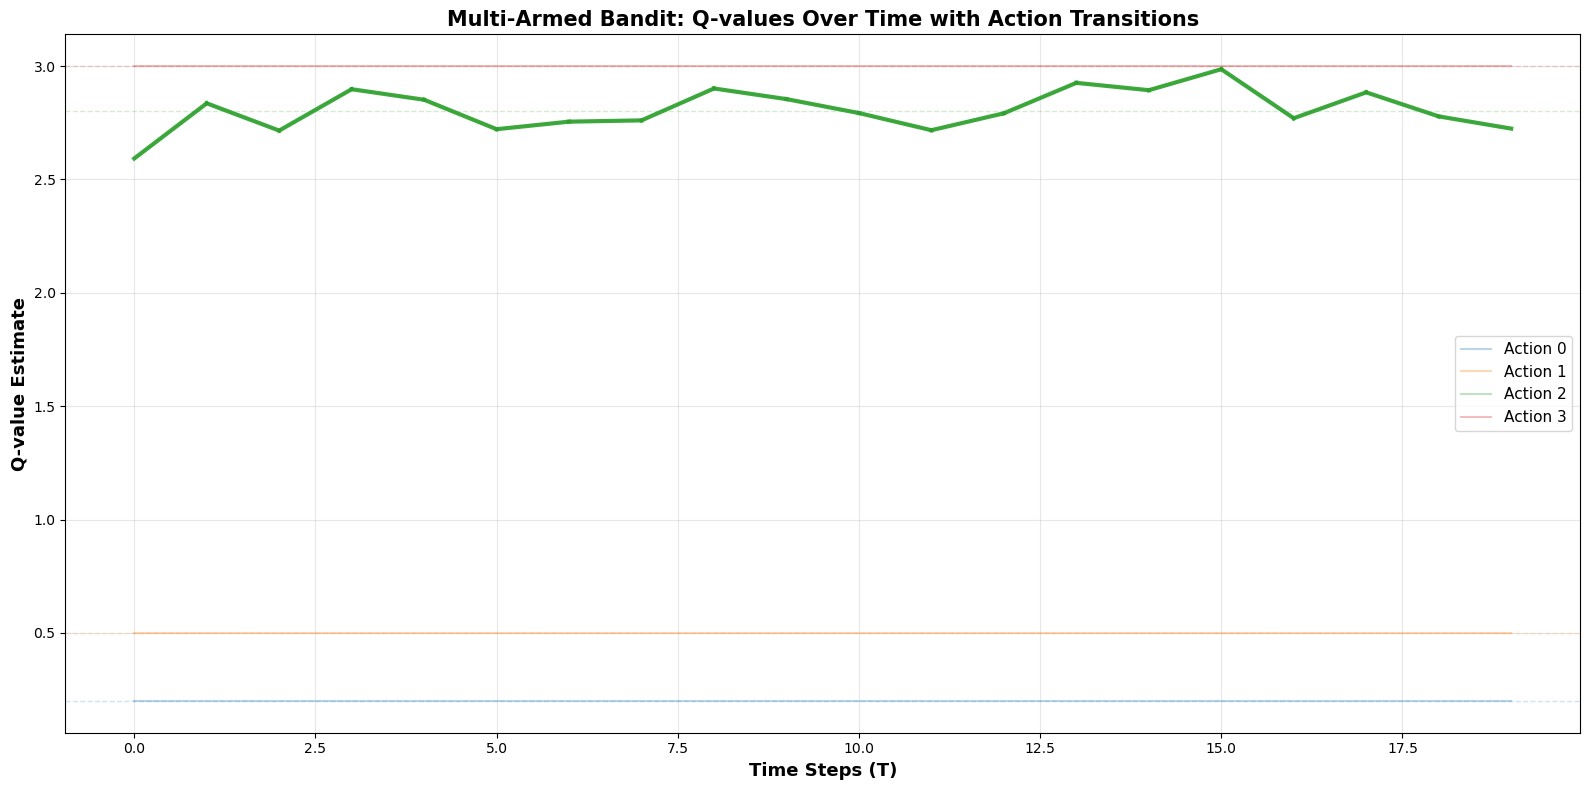


Transitions detected: 0


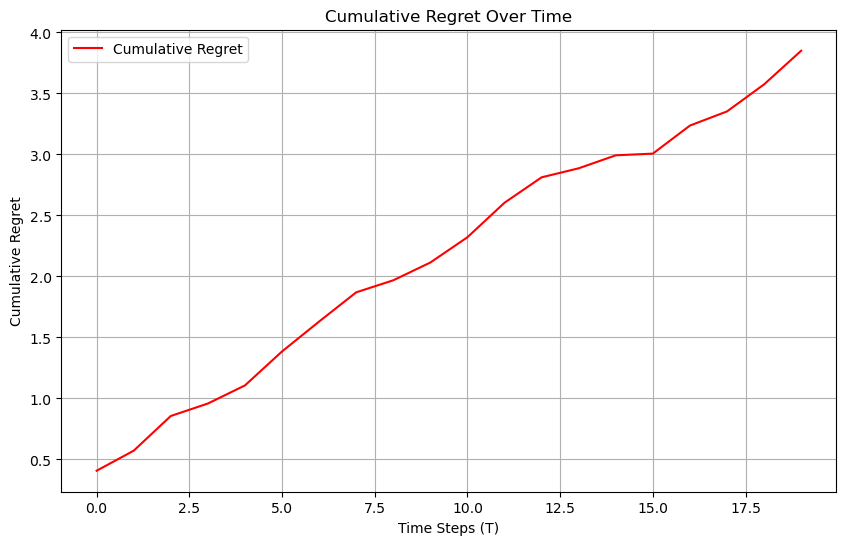

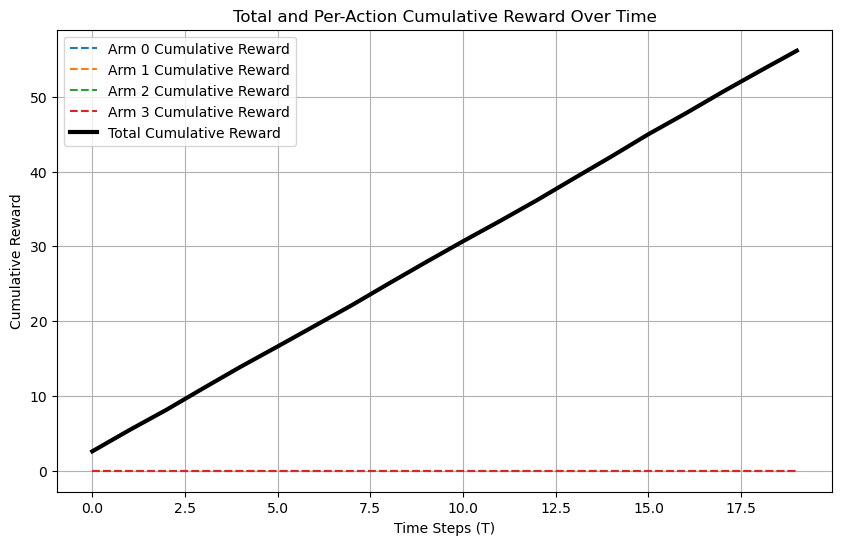

In [17]:
analyzer.finalize_analysis()
analyzer.plot_Qvalue()
analyzer.plot_regret()
analyzer.plot_cumulative_reward()

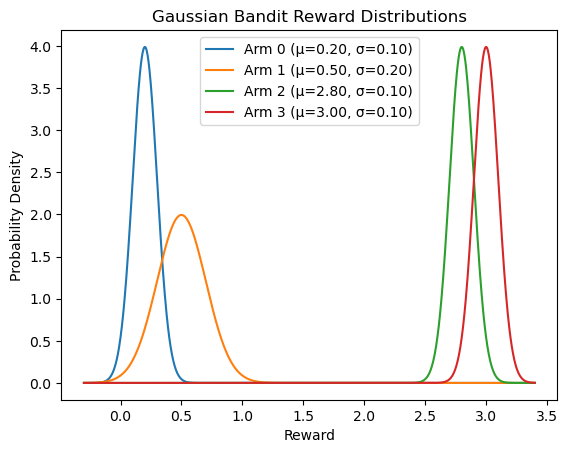

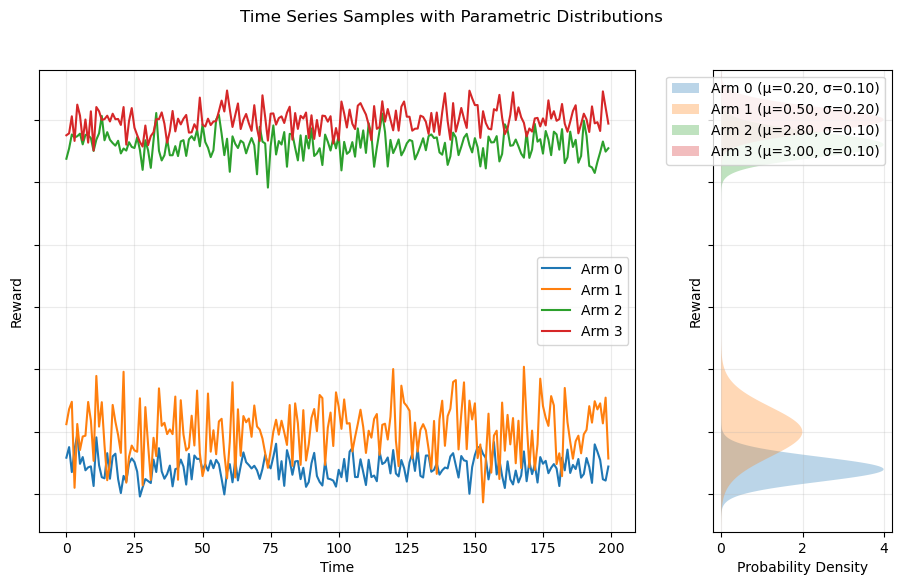

In [18]:
q = [0.2, 0.5, 2.8, 3.0]
stds  = [0.1, 0.2, 0.1, 0.1]

env = GaussianBandits(q, stds)
env.plot_parametric_distributions()
env.plot_time_series_with_distribution(T=200)

Created by Joseph Santacalo.
Licensed under Creative Commons Attribution (CC BY). Free to share and adapt with attribution.